In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from finance_utils.backtest import *
import seaborn as sns

In [2]:
times = ['2015-01-01', '2005-01-01', '1995-01-01', '1985-01-01']
tickers = ['^GSPC', '^RUT', '^NDX', '^HSI', '^990100-USD-STRD', 'AGG']
alternatives = ['BTC-USD']
# S&P 500, Russell 2000, Nasdaq 100, Hang Seng Index, MSCI World Index, US Aggregate Bond
df = yf.download(tickers, start=times[-1]).dropna()
df /= df.iloc[0]

[*********************100%%**********************]  6 of 6 completed


In [3]:
sixty_forty = 0.6 * df[('Close', '^GSPC')] + 0.4 * df[('Close', 'AGG')]
all_stocks = df[('Close', '^GSPC')]

def portfolio_strategy(ws, ts):
    if len(ws) != len(ts):
        raise ValueError('ws, ts should have the same length')
    if sum(ws) != 1:
        raise ValueError('sum of ws should equal 1')

    return sum([ws[i] * ts[i] for i in range(len(ws))])

In [4]:
def random_portfolio(_tickers: list):
    random_nums = np.random.random(len(_tickers))
    ws = random_nums / random_nums.sum()
    portfolio = portfolio_strategy(ws, _tickers)
    
    return portfolio, ws

def portfolio_risk(weights, prices):
    returns = prices.pct_change().fillna(0)
    cov_returns = np.cov(returns, rowvar=False)
    risk = np.matmul((np.matmul(weights, cov_returns)), np.transpose(weights))
    annualised_risk = np.sqrt(risk * 251) 
    
    return annualised_risk

def portfolio_returns(weights, prices):
    returns = prices.pct_change().fillna(0)
    mean_returns = np.mean(returns, axis = 0)
    return np.matmul(mean_returns, weights.T)

def start_simulations(_tickers: list, simulations: int = 1000):
    prices = df['Close']
    weights_list = []
    returns_list = np.zeros(simulations)
    risk_list = np.zeros(simulations)

    for i in range(simulations):
        random_nums = np.random.random(len(_tickers))
        w = random_nums / random_nums.sum()
        weights_list.append(w)
        mean_returns = portfolio_returns(w, prices)
        risks = portfolio_risk(w, prices)
        returns_list[i] = mean_returns
        risk_list[i] = risks
    
    return np.array(weights_list), returns_list * 251, risk_list

In [5]:
ws, returns, risks = start_simulations(tickers)

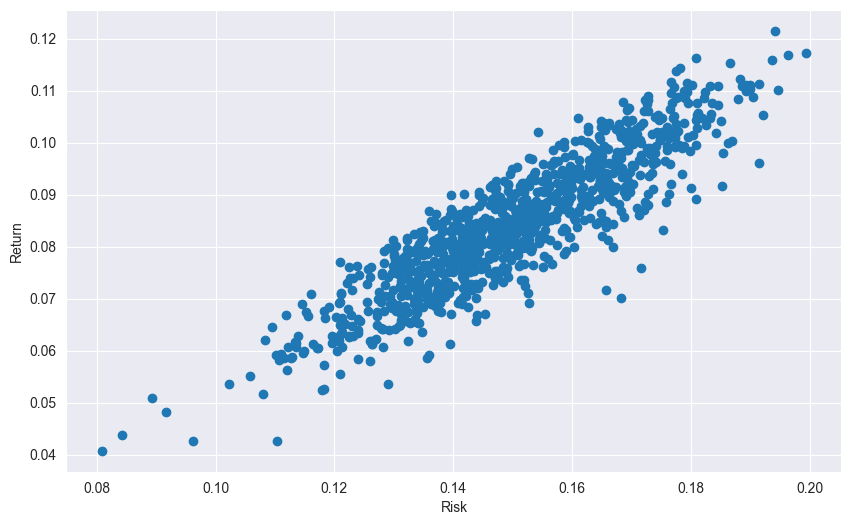

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(y=returns, x=risks)
plt.ylabel('Return')
plt.xlabel('Risk')
plt.show()

In [7]:
sharpe_ratios: np.array = returns / risks
max_sharpe_ind = sharpe_ratios.argmax()
max_returns_ind = returns.argmax()
min_risk_ind = risks.argmin()

---- Running the backtest... ----
---- Backtesting completed ----

Annualised Return (Geo): 0.06872153846625761
Avg Annual Return (Ari): 0.0674055334122306
Volatility (Std): 0.13585294853385044
Sharpe Ratio: 0.5058523882470927
Downside Volatility: 0.09721053860260682
Sortino Ratio: 0.7069350654170201
VaR 99: -0.025137475648301145
VaR 99 (Year): -0.249272807692233
CVaR 99: -0.03609697959900161
CVaR 99 (Year): -0.249272807692233
Initial Value: 1.0
Peak Value: 3.7635282456326924
Final Value: 3.7593688988727583
Max Drawdown: 0.39890326304372514
Avg Drawdown: 0.0678792641424083
Calmar Ratio: 0.17227620035468302
Sterling Ratio: 1.0124084186016256
Monthly Stats: 
      count      mean       std       min       25%       50%       75%  \
Date                                                                      
1      21.0  0.001085  0.032315 -0.071497 -0.018108  0.007255  0.016566   
2      21.0 -0.002223  0.030750 -0.070635 -0.021488  0.005475  0.020861   
3      21.0  0.005884  0.038861 -0.

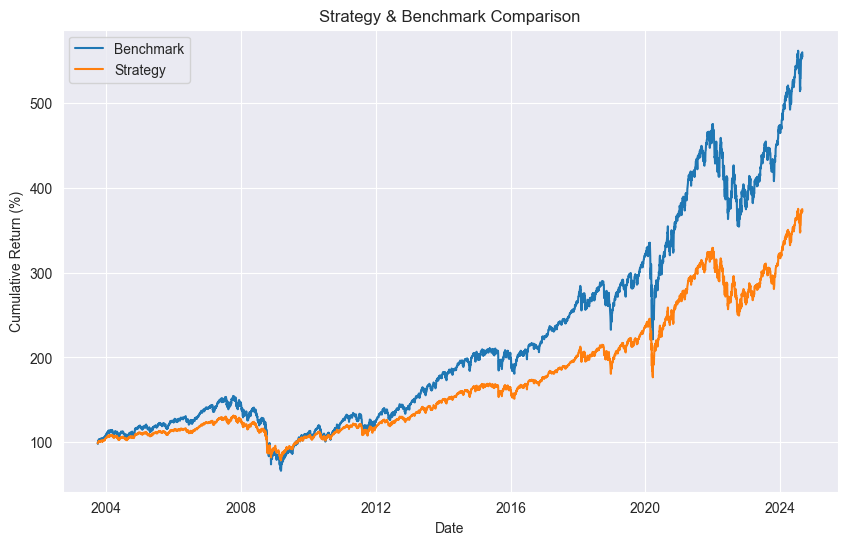

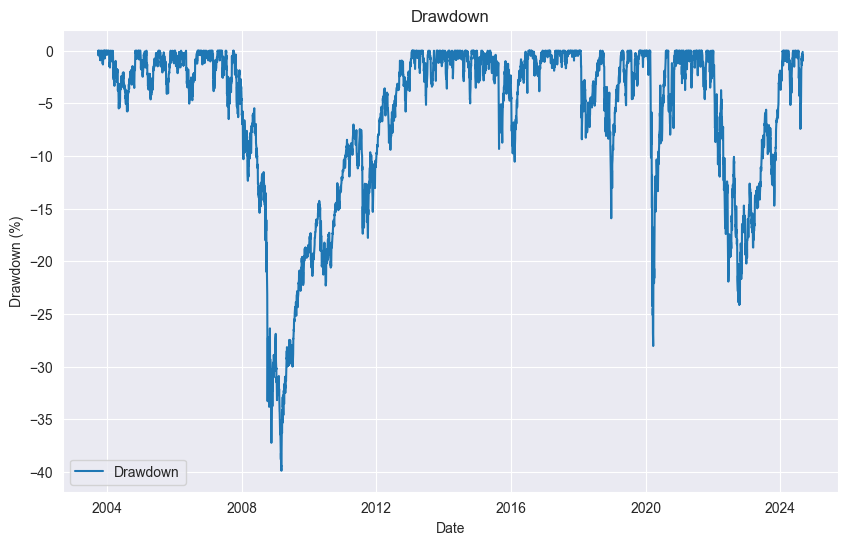

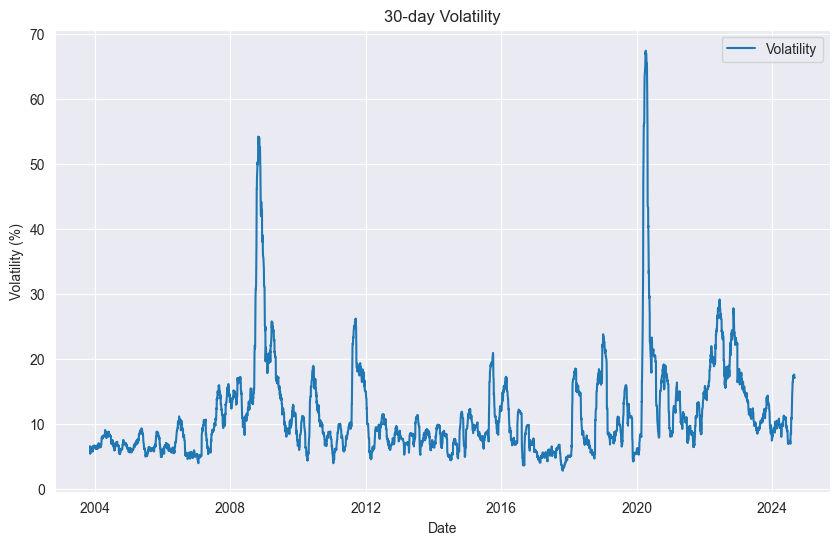

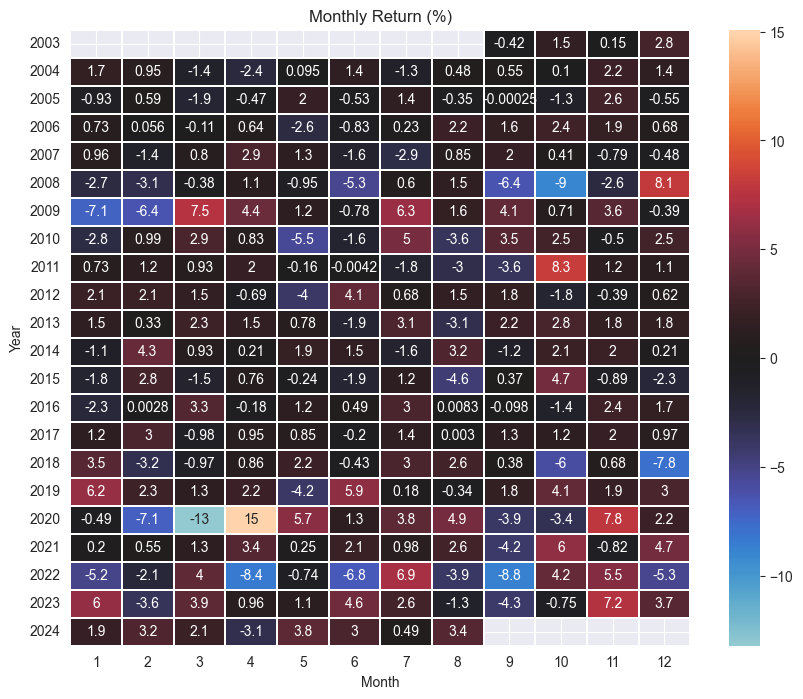

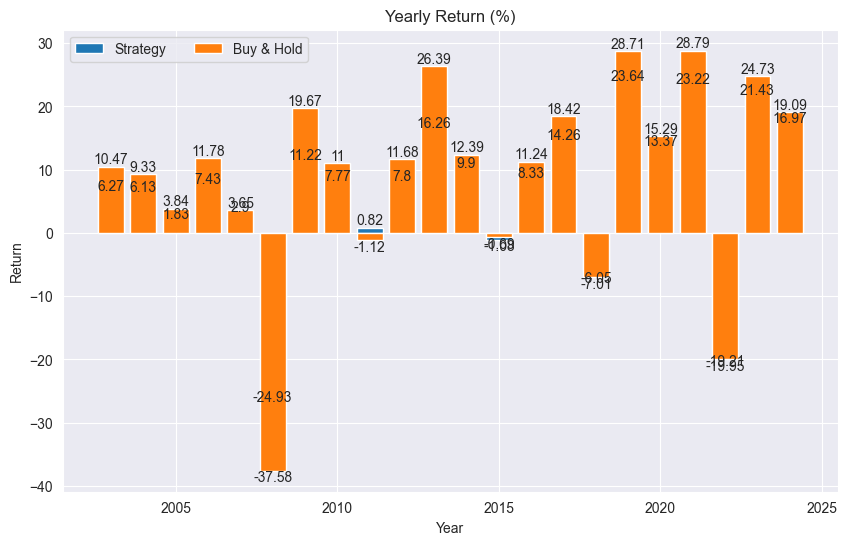

In [8]:
df1 = pd.DataFrame()
df1['Price'] = df[('Close', '^GSPC')]
df1['Value'] = sixty_forty
df1['Return'] = sixty_forty.pct_change()

test_df = Backtest(df1)